### Reached deadends here, started new notebook marathons_eda02 to start clean (without having changed dtypes for Time).  
Keeping this notebook for reference

#### Exploration of marathon data that was webscraped in marathons_webscraping data   


- Eight datasets, 2016-2019 for full and half maratons

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# To read in all data files for exploration

full_2016_df = pd.read_csv('../data/full_2016.csv')
full_2017_df = pd.read_csv('../data/full_2017.csv')
full_2018_df = pd.read_csv('../data/full_2018.csv')
full_2019_df = pd.read_csv('../data/full_2019.csv')
half_2016_df = pd.read_csv('../data/half_2016.csv')
half_2017_df = pd.read_csv('../data/half_2017.csv')
half_2018_df = pd.read_csv('../data/half_2018.csv')
half_2019_df = pd.read_csv('../data/half_2019.csv')

In [3]:
# To confirm shape of each dataset - confirmed against marathons_webscraping notebook.

print("Full 2016: ", full_2016_df.shape)
print("Full 2017: ", full_2017_df.shape)
print("Full 2018: ", full_2018_df.shape)
print("Full 2019: ", full_2019_df.shape)
print("Half 2016: ", half_2016_df.shape)
print("Half 2017: ", half_2017_df.shape)
print("Half 2018: ", half_2018_df.shape)
print("Half 2019: ", half_2019_df.shape)

Full 2016:  (3842, 4)
Full 2017:  (3651, 4)
Full 2018:  (2115, 4)
Full 2019:  (2811, 4)
Half 2016:  (22429, 4)
Half 2017:  (22292, 4)
Half 2018:  (14940, 4)
Half 2019:  (17236, 4)


### EDA of webscraped data

- Looked at prior work done on Marathons file to look for past notes about interesting data. 
- <b>FIRST:</b> I decided to attempt to recreate the visualization in Python that I had created in Excel about the apparent correlation of start time temperature on run times. Used dual axis column/line chart
    - x-axis: year
    - y-axis1: one column each for full and half marathons, showing % variance of current year time versus average time over 4-year period
    - y-axis2: line showing temperature at start
- <b>SECOND:</b>  Notes from original research....Why did the high temp in 2017 impact the half marathon times the most? Possible answers to research:
    - What are the start times of each race?
    - What were the average temparatures during the average race completion time?
    - <b>Are there any outliers causing the 6% spike in the half marathon (i.e., someone who finished much later for a reason that may not have been related to weather)</b>

In [4]:
# Reviewed .info() information to see dtypes.
# ACTION ITEM: Need to change all Time columns to datetime instead of object.

print(full_2016_df.info())
print(full_2017_df.info())
print(full_2018_df.info())
print(full_2019_df.info())
print(half_2016_df.info())
print(half_2017_df.info())
print(half_2018_df.info())
print(half_2019_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3842 entries, 0 to 3841
Data columns (total 4 columns):
Overall    3842 non-null int64
Bib        3842 non-null int64
Name       3842 non-null object
Time       3842 non-null object
dtypes: int64(2), object(2)
memory usage: 120.1+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3651 entries, 0 to 3650
Data columns (total 4 columns):
Overall    3651 non-null int64
Bib        3651 non-null int64
Name       3651 non-null object
Time       3651 non-null object
dtypes: int64(2), object(2)
memory usage: 114.2+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2115 entries, 0 to 2114
Data columns (total 4 columns):
Overall    2115 non-null int64
Bib        2115 non-null int64
Name       2115 non-null object
Time       2115 non-null object
dtypes: int64(2), object(2)
memory usage: 66.2+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2811 entries, 0 to 2810
Data columns (total 4 columns):
Overall    2811 non-null int

In [5]:
# Can't get mean of Time column because it's an object.
# ACTION ITEM: Convert to timedelta
full_2016_df.describe()

,Overall,Bib
count,3842.000000,3842.000000
mean,24301.906559,15431.385216
std,41576.036228,8600.621622
min,1.000000,1.000000
25%,963.250000,7298.250000
50%,1925.500000,16104.500000
75%,2889.750000,24009.750000
max,99999.000000,45340.000000


In [6]:
# Initially converted to datetime, but that was incorrect.
# Converting to pandas timedelta, which shows "Represents a duration, 
#    the difference between two dates or times." per Pandas documentation Pandas.Timedelta

full_2016_df.Time = pd.to_timedelta(full_2016_df.Time), errors='coerce')
print(full_2016_df.info())

#From John
#df['Time'] = pd.to_timedelta(df['Time'], errors='coerce')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3842 entries, 0 to 3841
Data columns (total 4 columns):
Overall    3842 non-null int64
Bib        3842 non-null int64
Name       3842 non-null object
Time       3842 non-null timedelta64[ns]
dtypes: int64(2), object(1), timedelta64[ns](1)
memory usage: 120.1+ KB
None


In [7]:
# This is too low because the non-finishers are still in the data.
full_2016_df.describe()

,Overall,Bib,Time
count,3842.000000,3842.000000,3842
mean,24301.906559,15431.385216,0 days 03:43:09.756637
std,41576.036228,8600.621622,0 days 02:07:35.096420
min,1.000000,1.000000,0 days 00:00:00
25%,963.250000,7298.250000,0 days 03:25:47.250000
50%,1925.500000,16104.500000,0 days 04:26:49
75%,2889.750000,24009.750000,0 days 05:10:26.750000
max,99999.000000,45340.000000,0 days 07:00:00


In [9]:
#Converting Time to datetime.timedelda (using pandas to_timedelta) 
#   in all dfs
full_2017_df.Time = pd.to_timedelta(full_2017_df.Time)
full_2018_df.Time = pd.to_timedelta(full_2018_df.Time)
full_2019_df.Time = pd.to_timedelta(full_2019_df.Time)
half_2016_df.Time = pd.to_timedelta(half_2016_df.Time)
half_2017_df.Time = pd.to_timedelta(half_2017_df.Time)
half_2018_df.Time = pd.to_timedelta(half_2018_df.Time)
half_2019_df.Time = pd.to_timedelta(half_2019_df.Time)

In [10]:
#Confirming the datetime change was applied correctly in each df
print(full_2016_df.info())
print(full_2017_df.info())
print(full_2018_df.info())
print(full_2019_df.info())
print(half_2016_df.info())
print(half_2017_df.info())
print(half_2018_df.info())
print(half_2019_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3842 entries, 0 to 3841
Data columns (total 4 columns):
Overall    3842 non-null int64
Bib        3842 non-null int64
Name       3842 non-null object
Time       3842 non-null timedelta64[ns]
dtypes: int64(2), object(1), timedelta64[ns](1)
memory usage: 120.1+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3651 entries, 0 to 3650
Data columns (total 4 columns):
Overall    3651 non-null int64
Bib        3651 non-null int64
Name       3651 non-null object
Time       3651 non-null timedelta64[ns]
dtypes: int64(2), object(1), timedelta64[ns](1)
memory usage: 114.2+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2115 entries, 0 to 2114
Data columns (total 4 columns):
Overall    2115 non-null int64
Bib        2115 non-null int64
Name       2115 non-null object
Time       2115 non-null timedelta64[ns]
dtypes: int64(2), object(1), timedelta64[ns](1)
memory usage: 66.2+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeInde

In [15]:
#Noticed from a few cells above that average(50%) for full_2016 is different from what 
#   I had in Excel. Rememered that there is one half marathon runner
#   incorrectly categorized as marathon, want to use scatte plot to figure out
#   if that runner was in 2016. Will work to correct that next.

#Next problem: Can't do scatter plot on datetime.timedelta field.

full_2016_df.plot(kind='scatter', x='Bib', y='Time')

ValueError: scatter requires y column to be numeric

KeyboardInterrupt: 

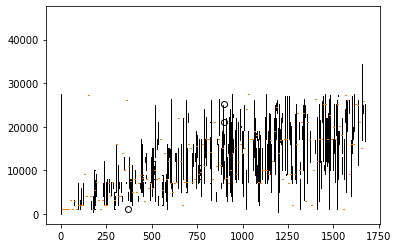

In [17]:
#Going to try a boxplot to see if that works to show outliers on timedelta column. 
#Nope, that doesn't work either. Back to the drawing board.

full_2016_df.boxplot(column='Bib', by='Time')

#### Good ideas from Michael

- drop all non-finishers (with 00:00 time)  

- Here's his code for converting to datetime then integer, to get mean by year, then convert back to datetime.  
    - all_finishers['Time'] = pd.to_datetime(all_finishers['Time']).values.astype(np.int64)     
    - df = all_finishers.groupby('year', as_index=False)['Time'].mean()   
    - df['Time'] = pd.to_datetime(df['Time'], unit='ns')   
    - print (df)   

### Starting a new notebook so I can save these notes, and start over without having converted to timedelta.